<a href="https://colab.research.google.com/github/SandeshBashyal/naamii_labs_2023/blob/main/Lab_1_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1 Ans:

## Simulate the position of dart throws by two players

In [1]:
# Importing modules
import numpy as np
import scipy.stats as stats

In [2]:
# Player 1
mean = (0, 0)
cov = [[1, 0],[0, 2]]
p = np.random.multivariate_normal(mean, cov, [2,1000])
z= stats.multivariate_normal(mean, cov, [2,1000])
p, z

(array([[[ 1.16389348,  0.36362719],
         [ 0.48027563,  3.05173171],
         [ 0.84458033, -0.86976821],
         ...,
         [-0.44218773, -0.3550431 ],
         [ 1.89231459, -2.73735736],
         [ 0.23651452, -3.41505504]],
 
        [[ 0.33609465,  1.03867121],
         [ 0.97027184,  0.88634879],
         [ 1.6488888 ,  1.76924834],
         ...,
         [ 0.24206463, -0.0819916 ],
         [ 1.26037979,  2.57875878],
         [-1.05029376,  0.46295055]]]),
 <scipy.stats._multivariate.multivariate_normal_frozen at 0x7f50795a23b0>)

In [3]:
# Player 2#
mean = (2, 1)
cov =  [[3, -2],[-2, 2]]
q = np.random.multivariate_normal(mean, cov, [2, 1000])
s= stats.multivariate_normal(mean, cov, [2, 1000])
type(q),type(s)

(numpy.ndarray, scipy.stats._multivariate.multivariate_normal_frozen)

In [4]:
# Counter plot
import matplotlib.pyplot as plt

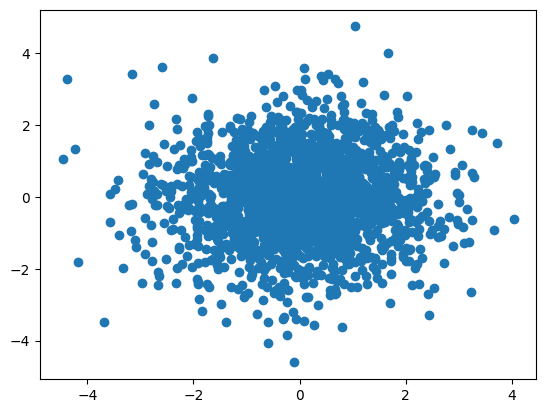

In [5]:
plt.scatter(p[0],p[1])

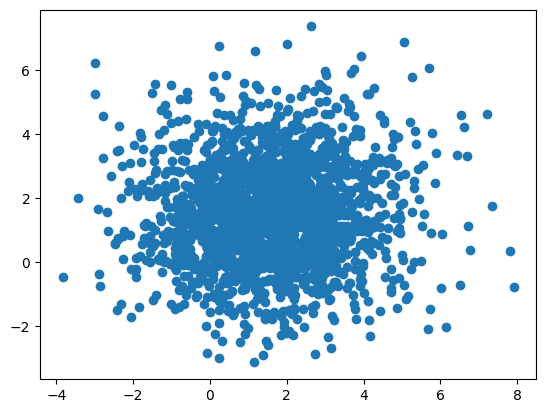

In [6]:
plt.scatter(q[0], q[1])

## Draw contourplot displaying the joint probability distributions

(-5.0, 5.0)

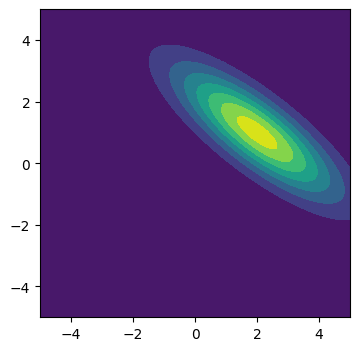

In [7]:
xx1, xx2 = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100), indexing='xy')
pos = np.dstack((xx1, xx2))
prob_dist = s.pdf(pos)
prob_dist /= np.sum(prob_dist)
fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_dist)
# ax2.plot(debruyne_xy[0, :], debruyne_xy[1, :], 'g.', markersize=3)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

(-5.0, 5.0)

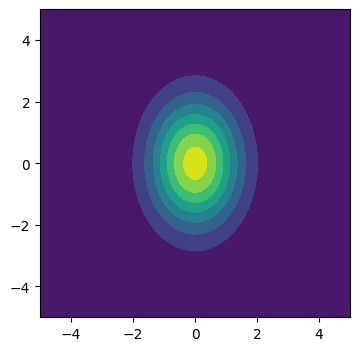

In [8]:
xx1, xx2 = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100), indexing='xy')
pos = np.dstack((xx1, xx2))
prob_dist = z.pdf(pos)
prob_dist /= np.sum(prob_dist)
fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_dist)
# ax2.plot(debruyne_xy[0, :], debruyne_xy[1, :], 'g.', markersize=3)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

## Generate 200 samples each for both players and plot those -> use numpy.random.choice

In [9]:
idx = np.arange(1000)

In [10]:
choice = np.random.choice(idx, 200)
choice, choice.shape

(array([566, 890, 990, 660, 352, 794, 856, 785, 798, 220, 299,  38, 652,
        159,  75, 625, 373, 226, 117, 140, 206, 981, 198, 729, 575, 611,
        406, 167, 488, 299, 815, 786, 732, 581, 840, 993, 293, 414, 652,
        394, 794, 216, 136, 252,   3, 955, 447, 978, 395, 669, 787, 986,
        611, 666, 811, 819, 238, 860, 861, 565, 570, 535, 823,   1, 835,
        164, 257,   1, 117, 426, 588, 192,   2, 822, 678, 986, 584, 889,
        848, 350, 919, 324, 173, 278, 470, 382, 409, 385, 671,  99, 944,
        202, 665, 286, 583, 503, 774, 515, 152, 869,  99,  90, 271, 695,
        733, 951, 411, 290, 448, 664, 765, 185, 950, 765, 872, 913, 668,
        318, 261, 314, 776, 893, 798, 735, 623,   7, 924, 489, 394, 385,
        321,  31, 361, 775, 410, 292, 674, 347, 120, 250, 922, 397, 293,
        626, 736, 724, 620, 843, 745, 348,  52, 669, 410, 149, 835, 675,
        450, 631, 514,  49, 531, 659,  52, 840, 530,  62, 469, 818, 327,
        139, 776, 269, 916, 709, 456, 416, 511, 291

In [11]:
p1samples = p[:, choice]

In [12]:
p2samples = q[:, choice]

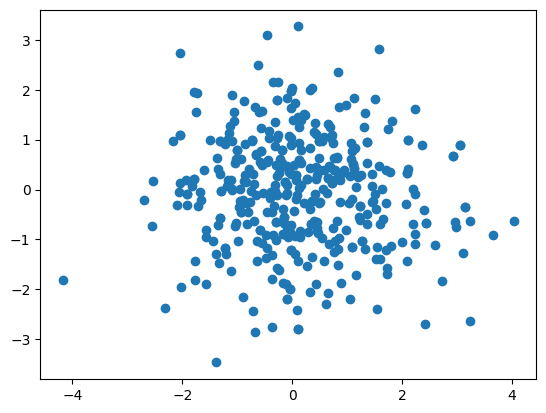

In [13]:
plt.scatter(p1samples[0],p1samples[1])

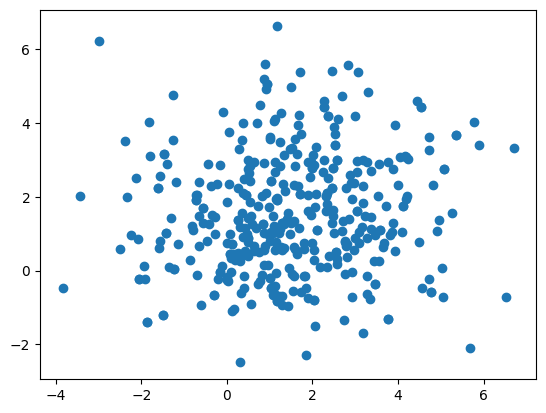

In [14]:
plt.scatter(p2samples[0],p2samples[1])

# Exercise 2 ans:

In [15]:
# Importing libraries
import numpy as np
from sklearn.metrics import accuracy_score

In [17]:
# fill this out

class LogisticRegressionCustom:
    """
    Implement the functions that have pass written.
    """
    T = 1e5
    # def __init__(self, solver='analytical'):
    #   # solver should be one of analytical, direct
    #   assert solver in ('analytical', 'direct')
    #   self.solver = solver
        
    def get_prob(self, X, beta):
      return 1 / (1 + np.exp(-(np.dot(X, beta)))) + 1e-10 # for log safety

    def loss(self, X, beta, y):
      prob = self.get_prob(X, beta)
      return np.mean(-y * np.log(prob) - (1 - y)* np.log(1 - prob))
    
    def gradient(self, X, beta, y):
      prob = self.get_prob(X, beta)
      return  np.dot(X.T, (prob - y)) / len(y)
    
    def gradient_descent_fit(self, X, beta, y, LR = 0.01, thresh = 0.5):
      count = 0
      beta_ = np.copy(beta)
      while count < self.T:
          count += 1
          grad = self.gradient(X, beta_, y)
          beta_ -= LR * grad
          if np.sum(np.abs(grad)) < thresh:
              break
      return beta_

    def fit(self, X, y):
      self.beta = np.zeros((X.shape[1] + 1))
      self.beta += np.random.randn(X.shape[1] + 1)
      intercept_X = np.ones((X.shape[0], 1))
      self.X = np.concatenate((intercept_X, X), axis=1)
      self.y = y
        
      fitted_beta = self.grad_descent_fit(
          self.X, self.beta, self.y
      )      
      # if self.solver == 'analytical':
      #     beta_all = self.grad_descent_fit_analytical(X, beta, y)
      # elif self.solver == 'direct':
      #     beta_all = self.grad_descent_fit(X, beta, y)
      # else:
      #     raise ValueError("unknown solver")
      # self.beta = beta_all[-1]
      # return self.beta, beta_all

      self.beta = fitted_beta
      return self.beta

      # def grad_descent_fit_analytical(self, X, beta, y, delta=0.01, LR=0.01, thresh=0.03):
      #   count = 0
      #   beta_ = np.copy(beta)
      #   beta_all = []
      #   while count < 1e5:
      #       count += 1
      #       grad = np.zeros(beta_.shape)
      #       for i, beta_i in enumerate(beta_):
      #           beta_plus = np.copy(beta_)
      #           beta_plus[i] += delta
      #           beta_minus = np.copy(beta_)
      #           beta_minus[i] -= delta
      #           loss_plus = self.loss(X, beta_plus, y)
      #           loss_minus = self.loss(X, beta_minus, y)
      #           grad[i] = (loss_plus - loss_minus) / (2 * delta)
      #       beta_ -= LR * grad
      #       beta_all.append(np.copy(beta_))
      #       if np.sum(np.abs(grad)) < thresh:
      #           break
      #   return beta_all
    
    def predict(self, X):

      intercept_X = np.ones((X.shape[0], 1))
      X = np.concatenate((intercept_X, X), axis=1)
      prob = self.get_prob(X, self.beta)
      return prob
      # y_predict =  np.dot(X, self.beta)
      # return y_predict

# Accuracy test
# score = accuracy_score(X, y_predict)
# score


# Predict
# logistic_model = LogisticReg(solver='analytical')
# fitted_beta, beta_all = logistic_model.fit(X_train, y_train)
# print(fitted_beta)